# Air Quality - Huairou Station (Beijing)

## Import Library

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Understanding

In [2]:
df = pd.read_csv('data.csv')
df

No  year  month  day  hour  PM2.5  PM10  SO2   NO2      CO    O3  \
0          1  2013      3    1     0    7.0   7.0  3.0   2.0   100.0  91.0   
1          2  2013      3    1     1    4.0   4.0  3.0   NaN   100.0  92.0   
2          3  2013      3    1     2    4.0   4.0  NaN   NaN   100.0  91.0   
3          4  2013      3    1     3    3.0   3.0  3.0   2.0     NaN   NaN   
4          5  2013      3    1     4    3.0   3.0  7.0   NaN   300.0  86.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  28.0  2.0  19.0   300.0  95.0   
35060  35061  2017      2   28    20   21.0  34.0  4.0  24.0   500.0  80.0   
35061  35062  2017      2   28    21   17.0  33.0  2.0  39.0   900.0  60.0   
35062  35063  2017      2   28    22   11.0  29.0  3.0  32.0  1400.0  69.0   
35063  35064  2017      2   28    23   11.0  20.0  2.0  27.0   400.0  77.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
0      -2.3  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1      -2.7  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2      -3.2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3      -3.3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4      -4.1  1022.1 -22.7   0.0  NNW   2.2  Huairou  
...     ...     ...   ...   ...  ...   ...      ...  
35059   9.9  1008.6 -14.1   0.0  WNW   1.8  Huairou  
35060   9.5  1008.9 -14.4   0.0  SSW   1.3  Huairou  
35061   8.4  1009.3 -14.6   0.0   SE   1.5  Huairou  
35062   8.3  1009.5 -14.7   0.0  ENE   3.2  Huairou  
35063   6.7  1009.3 -13.6   0.0   NE   1.9  Huairou  

[35064 rows x 18 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34111.000000  34287.000000  34084.000000  33425.000000  33642.000000   
mean      69.626367     91.482690     12.121553     32.497250   1022.554545   
std       71.224916     83.289578     18.896912     26.489531    898.738241   
min        2.000000      2.000000      0.285600      1.026500    100.000000   
25%       17.000000     28.000000      2.000000     12.000000    400.000000   
50%       47.000000     69.000000      4.000000     25.000000    800.000000   
75%       98.000000    131.000000     14.000000     46.000000   1300.000000   
max      762.000000    993.000000    315.000000    231.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33913.000000  35013.000000  35011.000000  35011.000000  35009.000000   
mean      59.824713     12.445426   1007.598568      2.238619      0.067940   
std       54.605746     11.751103     10.022101     14.052541      0.849046   
min        0.214200    -19.900000    982.800000    -43.400000      0.000000   
25%       18.000000      2.100000    999.300000     -9.600000      0.000000   
50%       49.000000     13.600000   1007.300000      2.700000      0.000000   
75%       83.000000     22.300000   1015.500000     15.300000      0.000000   
max      444.000000     40.300000   1036.500000     29.100000     45.900000   

               WSPM  
count  35015.000000  
mean       1.652021  
std        1.199143  
min        0.000000  
25%        0.900000  
50%        1.300000  
75%        2.000000  
max       12.900000

| Nama Variabel | Deskripsi |
|--------------|-----------|
| No | Nomor urut data (index dari dataset) |
| year |Tahun pengambilan data |
| month |Bulan pengambilan data (1 = Januari, 2 = Februari, dst.) |
| day | Hari dalam bulan pengambilan data |
| hour | Jam dalam hari pengambilan data (format 24 jam) |
| PM2.5 | Konsentrasi PM2.5 dalam µg/m³ (partikel halus dengan diameter ≤2.5µm) |
| PM10 | Konsentrasi PM10 dalam µg/m³ (partikel kasar dengan diameter ≤10µm) |
| SO2 | Konsentrasi Sulfur Dioksida (SO₂) dalam µg/m³ |
| NO2 | Konsentrasi Nitrogen Dioksida (NO₂) dalam µg/m³ |
| CO | Konsentrasi Karbon Monoksida (CO) dalam mg/m³ |
| O3 | Konsentrasi Ozon (O₃) dalam µg/m³ |
| TEMP | Temperatur udara dalam derajat Celcius (°C) |
| PRES | Tekanan atmosfer dalam hPa (hectopascal) |
| DEWP | Dew Point (Titik Embun) dalam °C (suhu di mana udara mulai mengembun) |
| RAIN | Curah hujan dalam mm |
| wd | Arah angin (dalam bentuk kategori, misalnya: N, NW, SE, dll.) |
| WSPM | Kecepatan angin dalam m/s |
| station | Nama stasiun pemantauan (dalam dataset ini: "Huairou") |

Kolom wd menjadi satu-satunya kolom categorical.

### Data Cleaning

Cek dan hapus baris data yang hilang

In [5]:
print(df.isnull().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64


In [6]:
df = df.dropna()
len(df)

31708

Cek data duplikat

In [7]:
df.duplicated().sum()

0

- Terdapat 3356 baris data yang memiliki data kosong. Karena datanya 35064 jadi perubahan datanya tidak terlalu signifikan
- Tidak ada data duplikasi pada dataset ini
- Outlier tidak dihapus karena mencari pola anomali menggunakan IsolationForest

### EDA - Univariate Analysis

In [8]:
df.describe(include='all')

No          year         month           day          hour  \
count   31708.000000  31708.000000  31708.000000  31708.000000  31708.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17854.999653   2014.697931      6.541504     15.668633     11.661063   
std      9970.988647      1.165937      3.482337      8.802324      6.931031   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      9310.750000   2014.000000      3.000000      8.000000      6.000000   
50%     17872.500000   2015.000000      7.000000     16.000000     12.000000   
75%     26456.250000   2016.000000     10.000000     23.000000     18.000000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   31708.000000  31708.000000  31708.000000  31708.000000  31708.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       70.285669     92.525792     12.275823     32.633827   1032.398291   
std        71.171533     83.458181     18.951478     26.460130    904.704799   
min         2.000000      3.000000      1.000000      2.000000    100.000000   
25%        18.000000     29.000000      2.000000     13.000000    400.000000   
50%        47.000000     70.000000      4.000000     25.000000    800.000000   
75%        99.000000    132.000000     14.000000     46.000000   1300.000000   
max       683.000000    993.000000    315.000000    231.000000  10000.000000   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   31708.000000  31708.000000  31708.000000  31708.000000  31708.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       59.722474     12.276487   1007.805223      2.064693      0.066904   
std        54.914792     11.750159      9.979929     14.072017      0.852596   
min         0.214200    -19.900000    982.800000    -34.900000      0.000000   
25%        18.000000      2.000000    999.600000     -9.900000      0.000000   
50%        49.000000     13.300000   1007.600000      2.300000      0.000000   
75%        82.000000     22.200000   1015.700000     15.100000      0.000000   
max       444.000000     40.300000   1036.500000     29.100000     45.900000   

           wd          WSPM  station  
count   31708  31708.000000    31708  
unique     16           NaN        1  
top        NW           NaN  Huairou  
freq     4561           NaN    31708  
mean      NaN      1.654106      NaN  
std       NaN      1.180881      NaN  
min       NaN      0.000000      NaN  
25%       NaN      0.900000      NaN  
50%       NaN      1.300000      NaN  
75%       NaN      2.000000      NaN  
max       NaN     12.900000      NaN

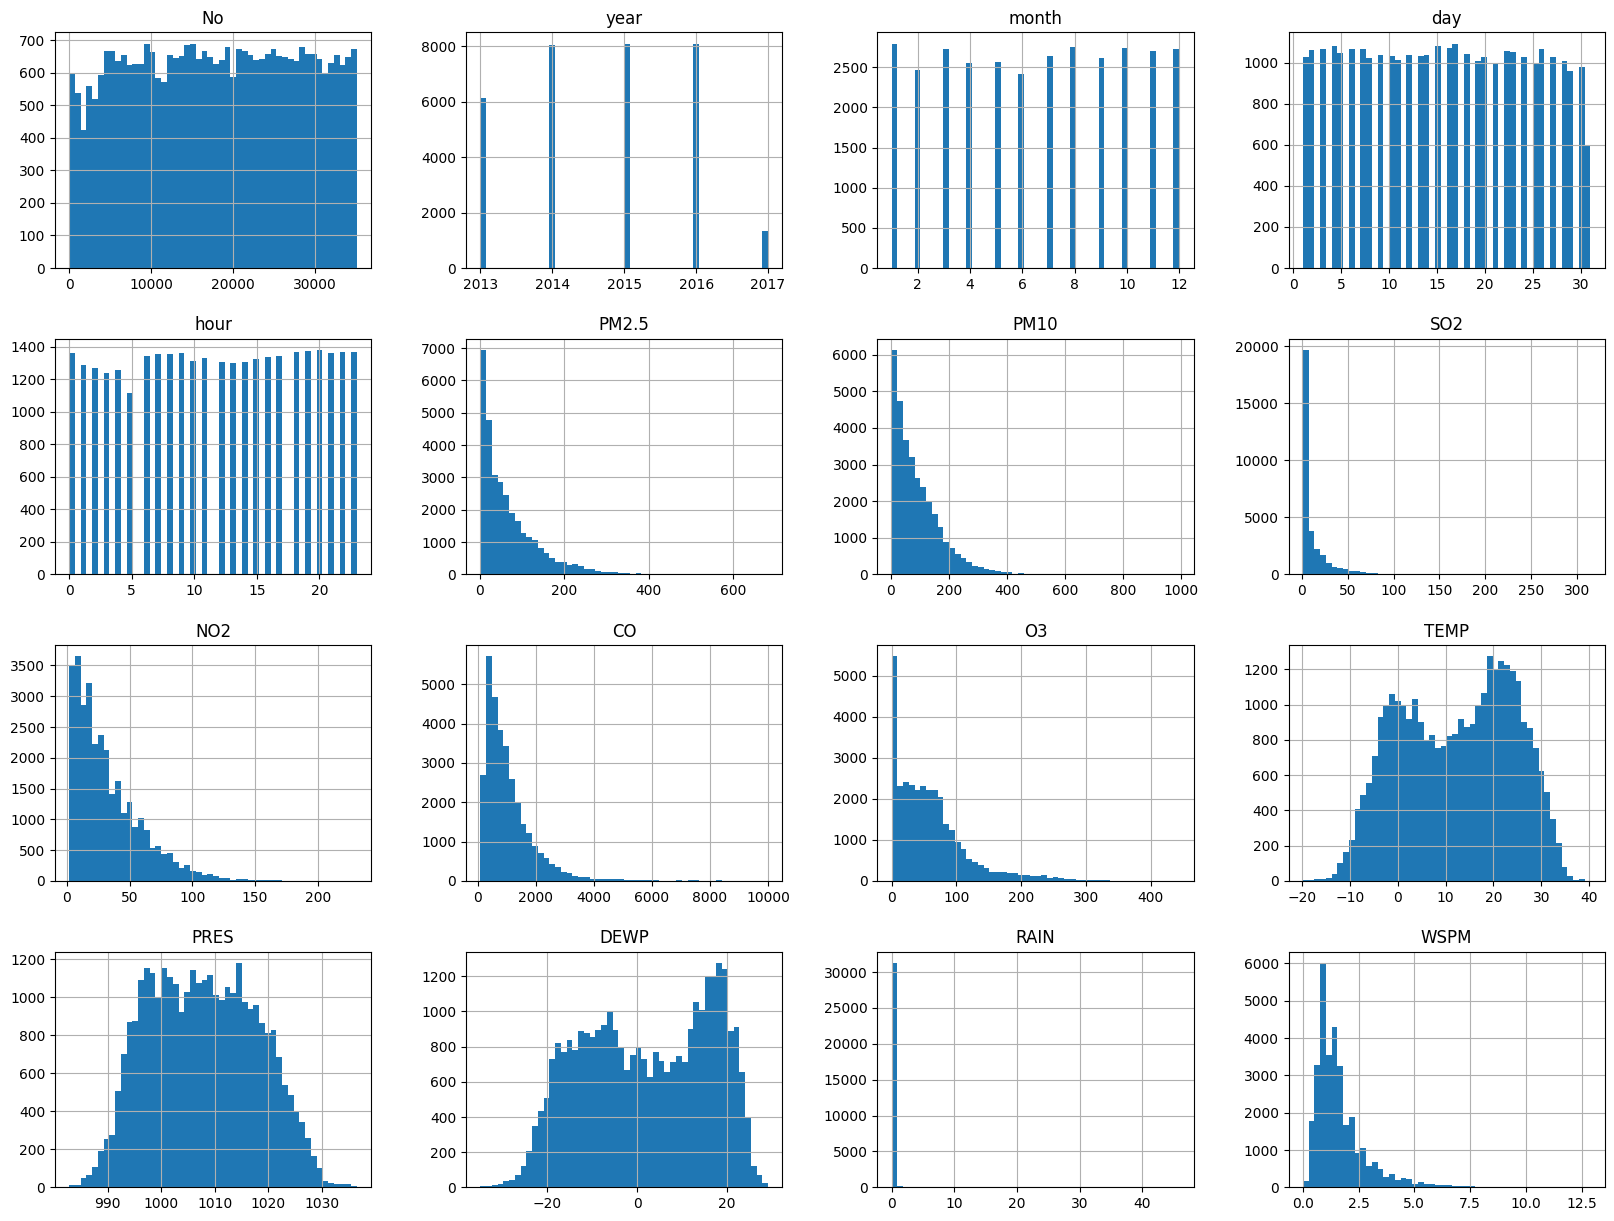

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Dilihat dari histogram variabel 'PM2.5', yang merupakan target fitur (label),
Data distribusi menunjukkan Miring ke Kanan, Pola ini menunjukkan bahwa konsentrasi partikel halus di udara umumnya dalam batas aman, tetapi terdapat periode di mana jumlahnya meningkat tajam. Partikel halus ini sangat berbahaya karena dapat masuk ke dalam sistem pernapasan manusia dan sering kali meningkat akibat pembakaran bahan bakar dan aktivitas industri.

     Count  Percent
wd                 
NW    4561     14.4
WNW   4368     13.8
NE    2053      6.5
E     1992      6.3
SE    1975      6.2
W     1914      6.0
ESE   1860      5.9
ENE   1830      5.8
SW    1632      5.1
NNE   1538      4.9
NNW   1519      4.8
SSE   1461      4.6
WSW   1331      4.2
N     1247      3.9
SSW   1217      3.8
S     1210      3.8


<Axes: title={'center': 'Wind Direction'}, xlabel='wd'>

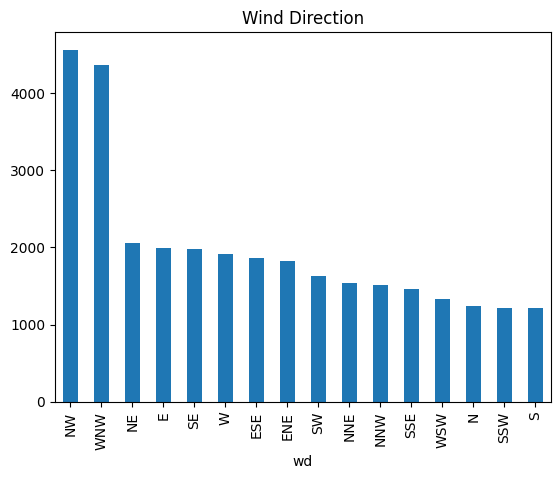

In [10]:
count = df['wd'].value_counts()
percent = 100*df['wd'].value_counts(normalize=True)
count_percent = pd.DataFrame({'Count':count, 'Percent':percent.round(1)})
print(count_percent)
count.plot(kind='bar', title='Wind Direction')

Terdapat 16 kategori yang mempresentasikan mata angin pada fitur wd, dari data tersebut bisa disimpulkan bahwa datanya hampir merata dengan yang tertinggi pada hari pada arah barat laut yaitu 14.4% dan arah selatan yang paling kecil datanya dengan presentase 3.8 persen.

### EDA - Multivariate Analysis

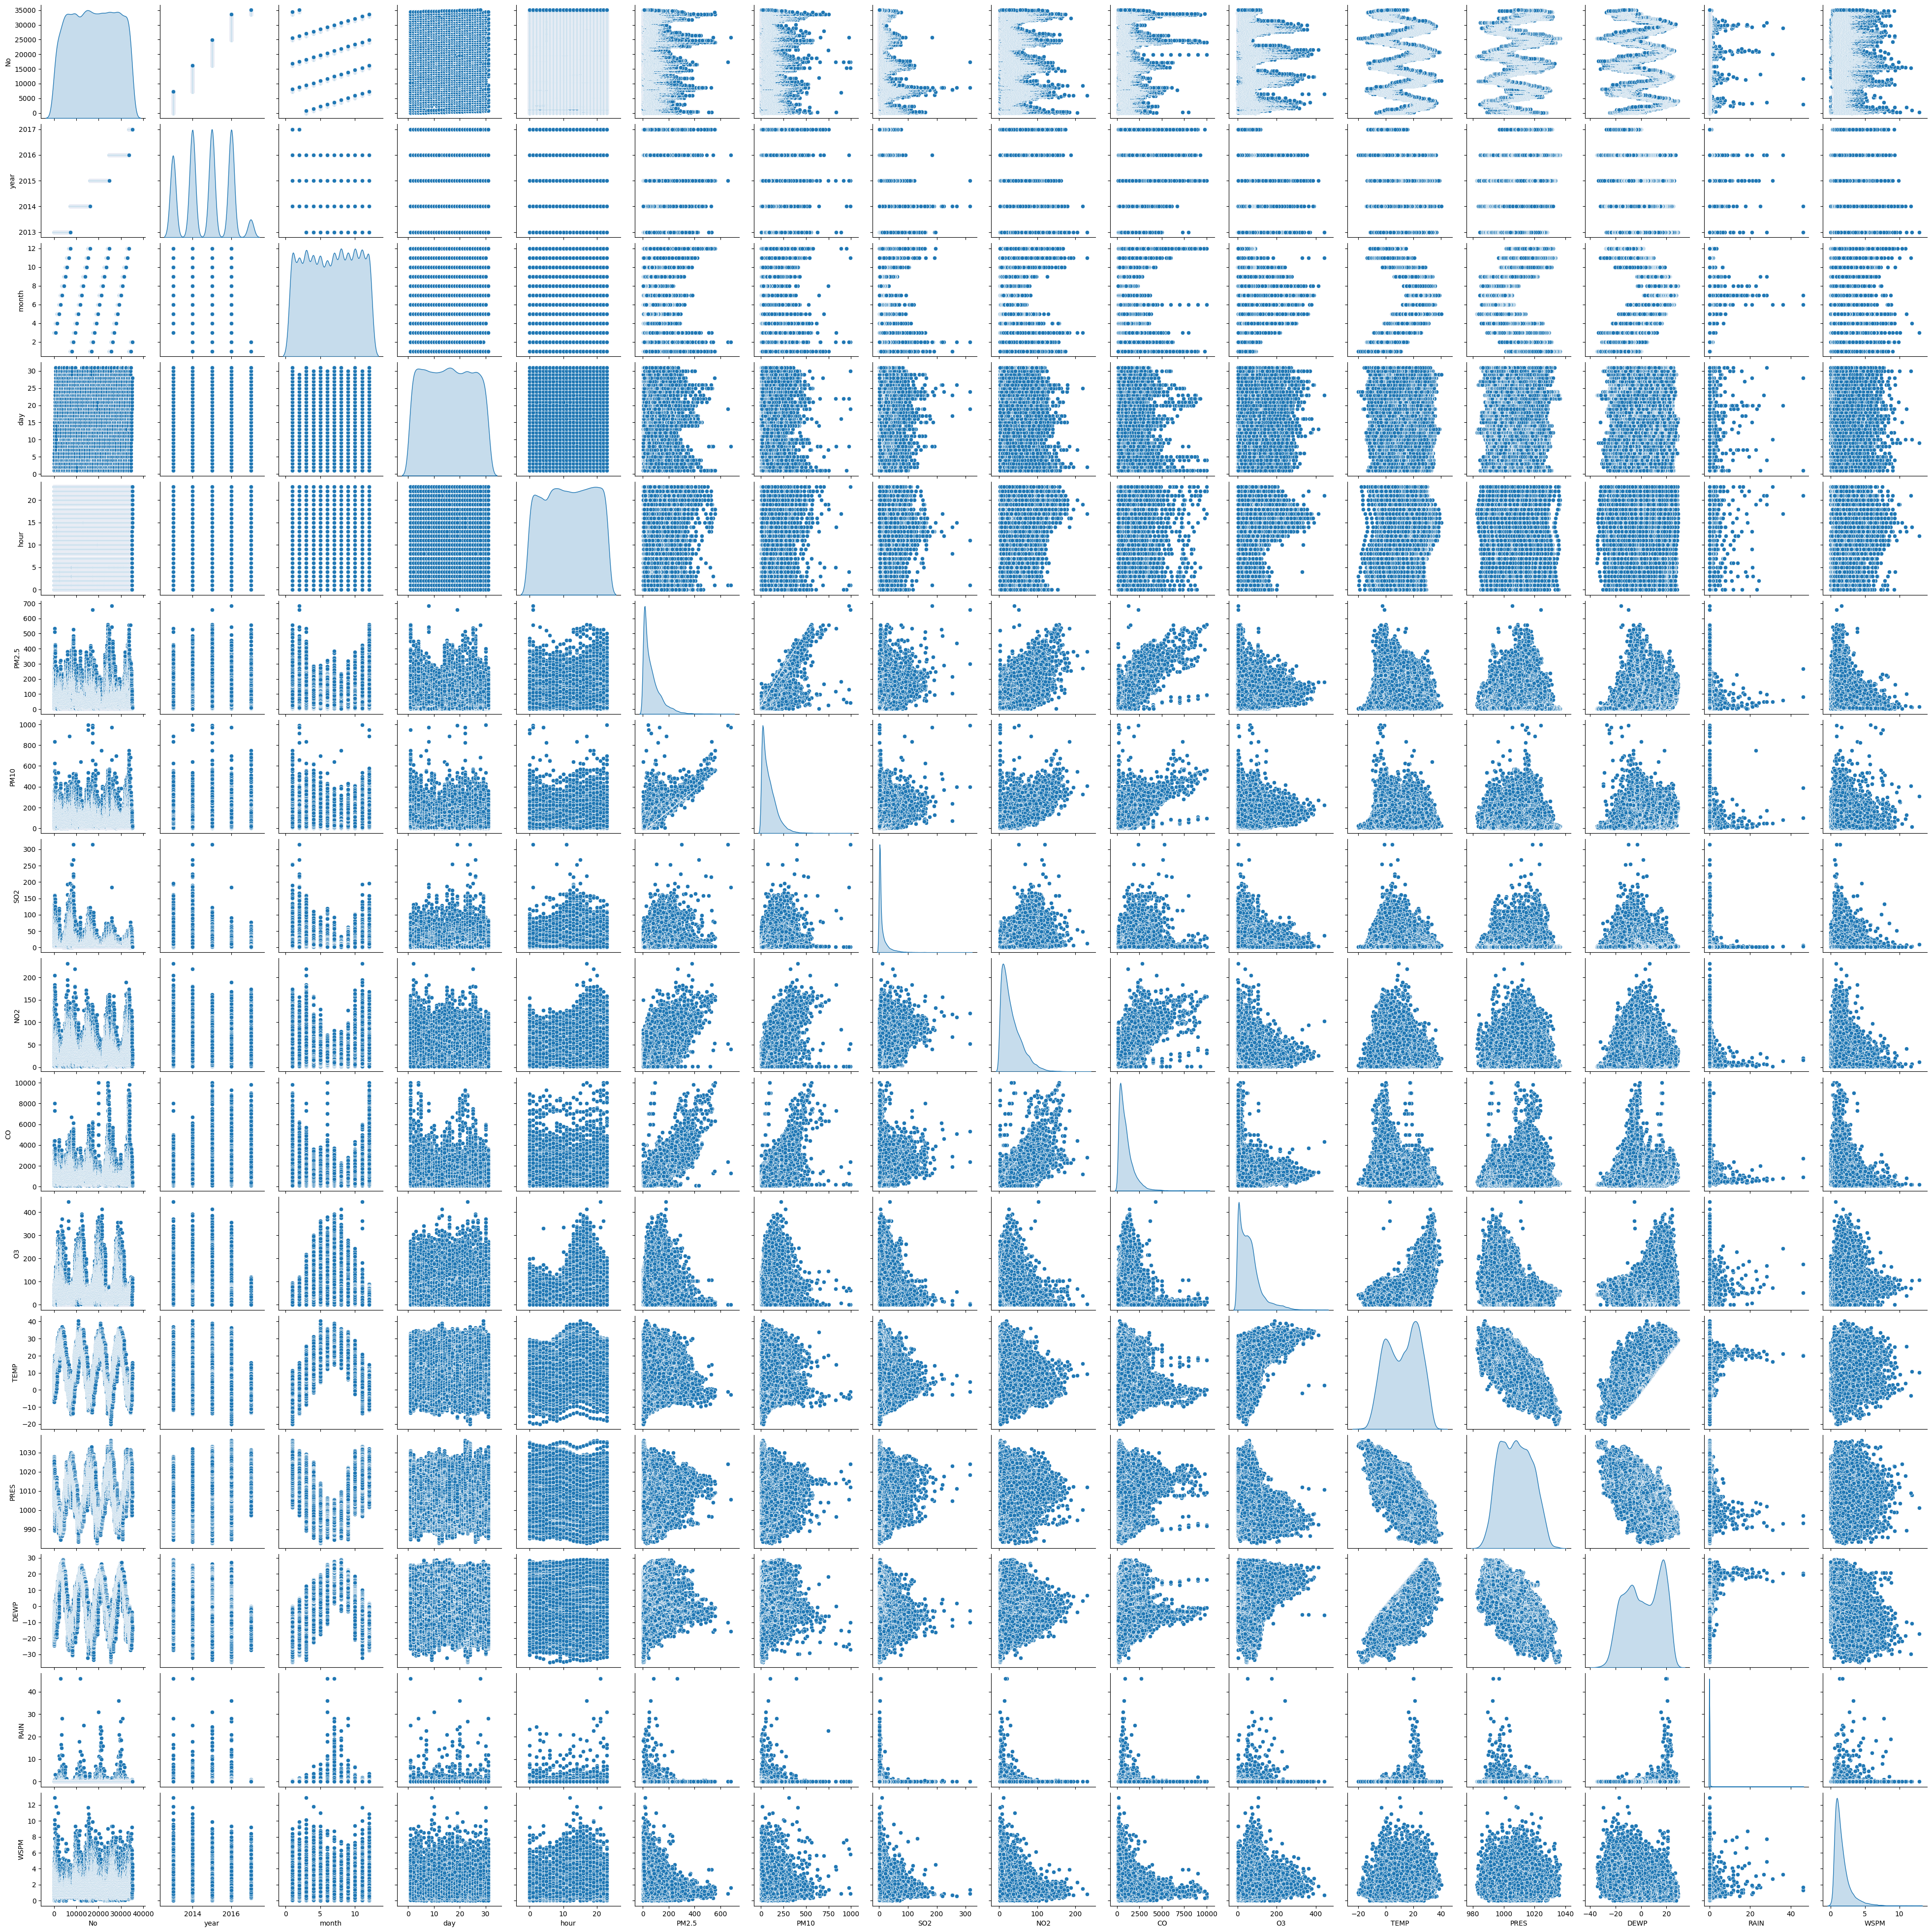

In [11]:
sns.pairplot(df, diag_kind='kde')
plt.show()

Berdasarkan scatter plot diatas CO, NO2, SO2, PM10 terlihat berhubungan dengan PM2.5 secara positif.

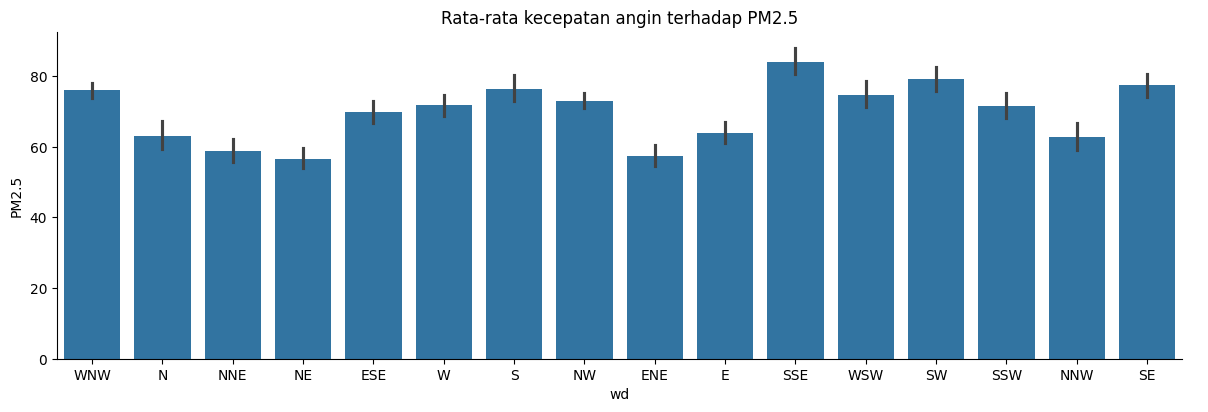

In [13]:
sns.catplot(x='wd', y='PM2.5', kind='bar', height=4, aspect=3, data=df)
plt.title(f'Rata-rata kecepatan angin terhadap PM2.5')
plt.show()

- Beberapa arah angin seperti SSE (South-Southeast) dan WNW (West-Northwest) memiliki PM2.5 tertinggi, yang berarti polusi lebih banyak ketika angin bertiup dari arah ini.
- Jika angin datang dari arah dengan PM2.5 tinggi, kemungkinan daerah tersebut memiliki sumber pencemaran signifikan (misalnya industri, pembakaran sampah, atau aktivitas kendaraan berat). Jika angin datang dari arah dengan PM2.5 rendah, kemungkinan angin membawa udara lebih bersih, atau ada faktor geografis yang membantu menyebarkan polutan.

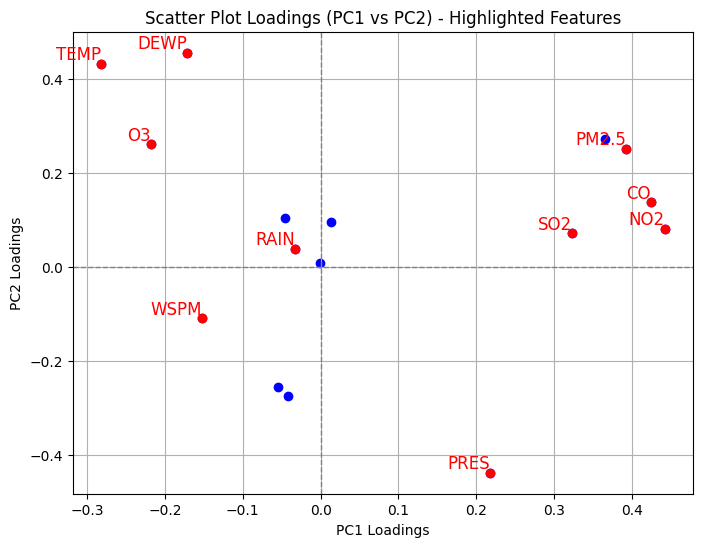

In [12]:
numerical_df = df.select_dtypes(include=['number'])
scaled_data = StandardScaler().fit_transform(numerical_df)

pca = PCA(n_components=2)
pca.fit(scaled_data)

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=numerical_df.columns
)

plt.figure(figsize=(8, 6))
plt.scatter(loadings.iloc[:, 0], loadings.iloc[:, 1], color='blue')

highlight_features = ['PM2.5', 'SO2', 'NO2', 'CO', 'TEMP', 'PRES', 'DEWP', 'WSPM', 'RAIN', 'O3']
for feature in highlight_features:
    if feature in loadings.index:
        plt.scatter(loadings.loc[feature, "PC1"], loadings.loc[feature, "PC2"], color='red')
        plt.text(loadings.loc[feature, "PC1"], loadings.loc[feature, "PC2"], feature, fontsize=12, ha='right', va='bottom', color='red')

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("PC1 Loadings")
plt.ylabel("PC2 Loadings")
plt.title("Scatter Plot Loadings (PC1 vs PC2) - Highlighted Features")
plt.grid(True)
plt.show()

Berdasarkan scatter plot diatas, PM2.5, SO2, NO2, CO, TEMP, PRES, DEWP, WSPM akan digunakan sebagai fitur untuk membuat model.

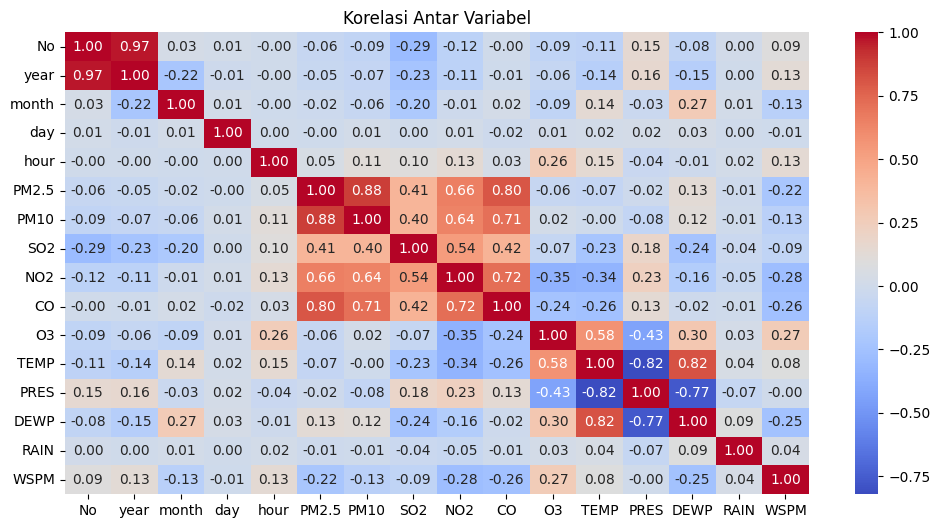

In [14]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel')
plt.show()

Korelasi antar variabel menunjukkan bahwa PM2.5 memiliki hubungan kuat dengan polutan lain seperti CO, NO2 dan SO2, yang umumnya berasal dari kendaraan dan industri. Ozon (O3) menunjukkan pola kebalikan dengan NO2 dan CO, karena terbentuk melalui reaksi fotokimia di udara. Dengan memahami hubungan ini, strategi pengendalian polusi dapat difokuskan pada pengurangan emisi dan pemanfaatan faktor lingkungan untuk meningkatkan kualitas udara.

## Data Preparation

Sebelum membuat model, data disiapkan melalui 3 proses yaitu:
- Encoding fitur kategori menggunakan
- Pembagian dataset menjadi data latih dan data uji
- Standarisasi

In [15]:
le = LabelEncoder()
df['wd'] = le.fit_transform(df['wd'])

df

<ipython-input-15-363141529d6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wd'] = le.fit_transform(df['wd'])


No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    7.0   7.0   3.0   2.0   100.0  91.0   
5          6  2013      3    1     5    4.0   4.0   3.0   3.0   200.0  85.0   
6          7  2013      3    1     6    3.0   6.0  33.0   7.0   300.0  82.0   
7          8  2013      3    1     7    3.0  10.0  13.0  13.0   400.0  71.0   
8          9  2013      3    1     8    3.0  13.0  34.0  38.0   800.0  45.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  28.0   2.0  19.0   300.0  95.0   
35060  35061  2017      2   28    20   21.0  34.0   4.0  24.0   500.0  80.0   
35061  35062  2017      2   28    21   17.0  33.0   2.0  39.0   900.0  60.0   
35062  35063  2017      2   28    22   11.0  29.0   3.0  32.0  1400.0  69.0   
35063  35064  2017      2   28    23   11.0  20.0   2.0  27.0   400.0  77.0   

       TEMP    PRES  DEWP  RAIN  wd  WSPM  station  
0      -2.3  1020.3 -20.7   0.0  14   3.1  Huairou  
5      -4.2  1022.3 -24.5   0.0   3   4.3  Huairou  
6      -5.9  1023.1 -21.9   0.0  14   0.6  Huairou  
7      -2.7  1024.3 -23.2   0.0   5   3.4  Huairou  
8      -1.6  1025.2 -23.5   0.0   5   4.6  Huairou  
...     ...     ...   ...   ...  ..   ...      ...  
35059   9.9  1008.6 -14.1   0.0  14   1.8  Huairou  
35060   9.5  1008.9 -14.4   0.0  11   1.3  Huairou  
35061   8.4  1009.3 -14.6   0.0   9   1.5  Huairou  
35062   8.3  1009.5 -14.7   0.0   1   3.2  Huairou  
35063   6.7  1009.3 -13.6   0.0   4   1.9  Huairou  

[31708 rows x 18 columns]

In [16]:
X = df.drop('PM2.5', axis=1)
X = df.drop('station', axis=1)
y = df['PM2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
features = ['TEMP', 'PRES', 'DEWP', 'WSPM', 'wd', 'SO2', 'NO2', 'CO']
scaler.fit(X_train[features])
X_train[features] = scaler.transform(X_train[features])
X_train[features].head()

TEMP      PRES      DEWP      WSPM        wd       SO2       NO2  \
9766  -0.217699  0.111106 -0.106074 -0.466262 -0.176293  0.195157  1.632048   
33130 -1.101632  1.392540 -0.966127  0.290485 -1.249603 -0.439223 -0.330083   
21743  0.598238 -0.509589  1.137804 -0.802594 -0.820279 -0.544952 -0.858349   
29161  0.700230 -1.150306  1.109372  0.794983  1.111680 -0.544952 -0.933815   
5136   0.419752  0.041027  1.073833 -0.802594  1.326342 -0.492088  0.009517   

             CO  
9766   0.073411  
33130 -0.479855  
21743 -0.590508  
29161 -0.701161  
5136  -0.037242

## Modeling

In [18]:
models = {
    'RF': RandomForestRegressor(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'DT': DecisionTreeRegressor()
}

result = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2-Score': r2_score(y_test, y_pred)
    }

pd.DataFrame(result)

RF          SVM         KNN        DT
MAE       0.026488    49.553009    7.849902  0.016131
MSE       0.467588  5536.705057  163.062356  0.122439
R2-Score  0.999909    -0.073129    0.968395  0.999976

Decision Tree adalah model dengan performa yang paling terbaik

In [26]:
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_

y_pred_best = best_dt.predict(X_test)
print("Best Decision Tree R2 Score:", r2_score(y_test, y_pred_best))
print("Best Hyperparameters:", grid_search.best_params_)


Best Decision Tree R2 Score: 0.999964552609448
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


### Isolation Forest

<ipython-input-29-bd142ae51ae7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anomaly'] = iso_forest.fit_predict(X)


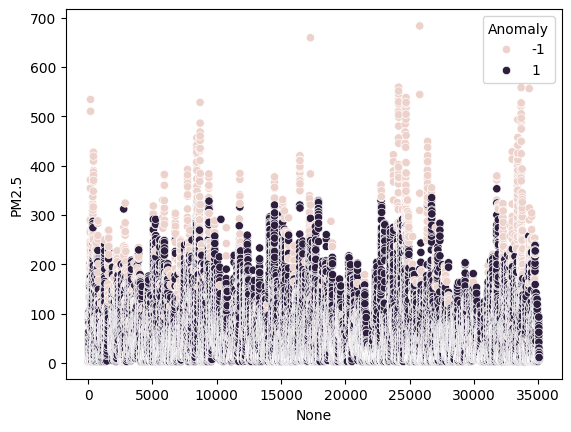

In [29]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(X)

sns.scatterplot(x=df.index, y=df['PM2.5'], hue=df['Anomaly'])
plt.show()

Sebagian besar anomali berada pada nilai PM2.5 yang tinggi (>200).
Ini bisa menunjukkan kejadian polusi ekstrem atau kesalahan sensor.
Puncak polusi yang sangat tinggi (>500) juga terdeteksi sebagai outlier, yang mungkin terjadi akibat kondisi lingkungan tertentu seperti kebakaran hutan atau pencemaran industri.